In [47]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import seaborn as sns

In [118]:
PATH_DRAW = '../out/draw_many/'
PATH_HOVER_CLOSE = '../out/close/'
PATH_HOVER_HIGH = '../out/hover_high/'

IMG_SIZE = 48

In [10]:
def crop_image(img, size = 48):
    margin = int(size / 2)
    _, brightest, _, (max_x, max_y) = cv2.minMaxLoc(img)
    img_cropped = img[max_y - margin : max_y + margin, max_x - margin : max_x + margin]
    return img_cropped, (max_x, max_y)

In [11]:
def read_images(path):
    files = os.listdir(path)
    files = [file for file in files if file[-4:] == ".png"]
    
    images = []
    coords = []
    
    size = IMG_SIZE
    
    for file in tqdm(files):
        try:
            image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            #image = cv2.resize(image, (36,36), cv2.INTER_AREA)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #image = data_augmentation(image)
            image, (max_x, max_y) = crop_image(image, size)
            coords.append((max_x, max_y))
            if image.shape == (size, size):
                images.append(image)
            
        except OSError:
            pass
    
    return images, coords

In [41]:
# Nick Allen: https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv
def border_crop(image):
    y_nonzero, x_nonzero = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

In [119]:
images_draw, _ = read_images(PATH_DRAW)
images_hover_close, _ = read_images(PATH_HOVER_CLOSE)
images_hover_high, _ = read_images(PATH_HOVER_HIGH)

/tmp/ipykernel_318074/1043679742.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(files):


  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/192 [00:00<?, ?it/s]

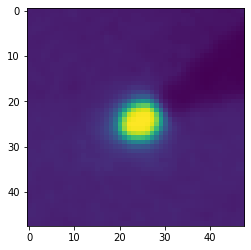

In [58]:
plt.imshow(images_draw[1])

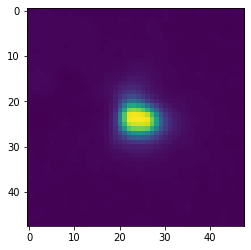

In [57]:
plt.imshow(images_hover_close[1])

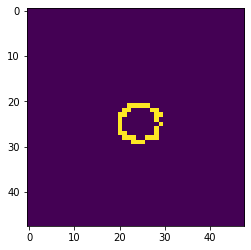

In [21]:
edges = cv2.Canny(images_draw[0], 100, 200)
plt.imshow(edges)

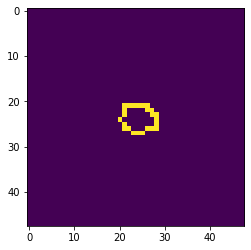

In [59]:
edges = cv2.Canny(images_hover_close[1], 100, 200)
plt.imshow(edges)

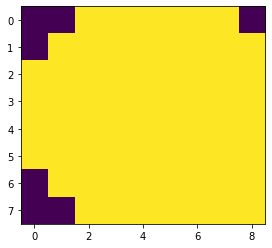

In [42]:
_, thresh = cv2.threshold(images_draw[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = border_crop(thresh)
plt.imshow(thresh)

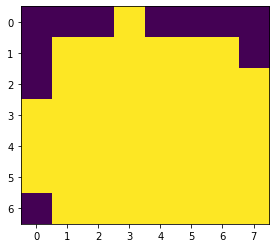

In [56]:
_, thresh = cv2.threshold(images_hover_close[1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = border_crop(thresh)
plt.imshow(thresh)

In [44]:
print(thresh.shape)

(7, 9)


In [120]:
aspects = []

for i in range(len(images_draw)):
    std = np.std(images_draw[i])
    mean = np.mean(images_draw[i])
    _, thresh = cv2.threshold(images_draw[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = border_crop(thresh)
    aspects.append({'label' : 'draw', 'x' : thresh.shape[1], 'y' : thresh.shape[0], 'aspect' : thresh.shape[0] / thresh.shape[1], 'mean' : mean, 'std' : std})
    
for i in range(len(images_hover_close)):
    std = np.std(images_hover_close[i])
    mean = np.mean(images_hover_close[i])
    _, thresh = cv2.threshold(images_hover_close[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = border_crop(thresh)
    aspects.append({'label' : 'hover_close', 'x' : thresh.shape[1], 'y' : thresh.shape[0], 'aspect' : thresh.shape[0] / thresh.shape[1], 'mean' : mean, 'std' : std})

for i in range(len(images_hover_high)):
    std = np.std(images_hover_high[i])
    mean = np.mean(images_hover_high[i])
    _, thresh = cv2.threshold(images_hover_high[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = border_crop(thresh)
    aspects.append({'label' : 'hover_high', 'x' : thresh.shape[1], 'y' : thresh.shape[0], 'aspect' : thresh.shape[0] / thresh.shape[1], 'mean' : mean, 'std' : std})

In [121]:
df = pd.DataFrame(aspects)

<AxesSubplot:xlabel='x', ylabel='y'>

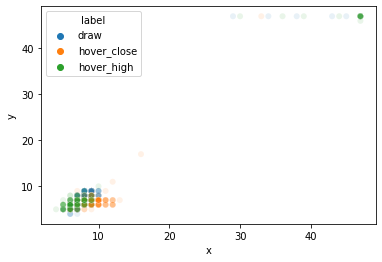

In [122]:
sns.scatterplot(data=df, x='x', y='y', hue='label', alpha=0.1)

<AxesSubplot:xlabel='label', ylabel='aspect'>

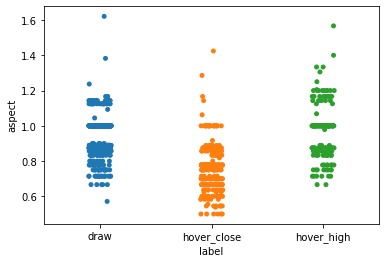

In [123]:
sns.stripplot(data=df, x='label', y='aspect')

<AxesSubplot:xlabel='label', ylabel='mean'>

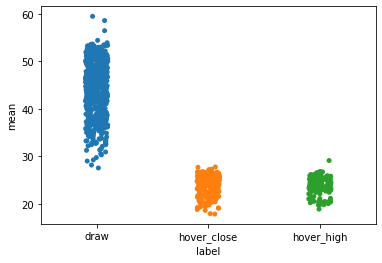

In [124]:
sns.stripplot(data=df, x='label', y='mean')

<AxesSubplot:xlabel='label', ylabel='std'>

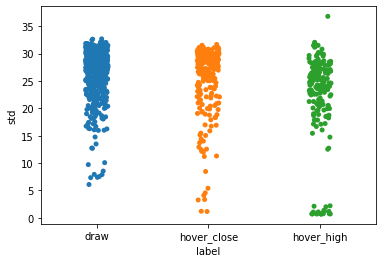

In [125]:
sns.stripplot(data=df, x='label', y='std')

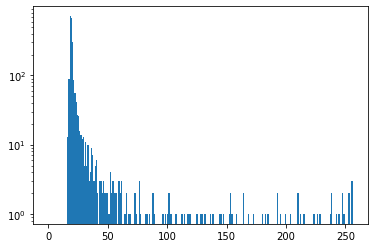

In [126]:
plt.hist(images_hover_close[20].ravel(),256,[0,256])
plt.yscale('log')
plt.show()

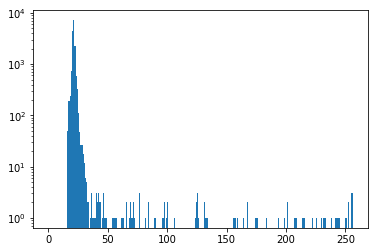

In [91]:
plt.hist(images_hover_high[143].ravel(),256,[0,256])
plt.yscale('log')
plt.show()

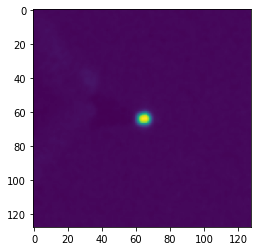

In [90]:
plt.imshow(images_hover_high[143])

In [95]:
np.std(images_hover_close[20])

11.184117799413178

In [96]:
np.std(images_hover_high[143])

9.90138000297827